# Causal Survival Analysis
Bs Vương Kiến Thanh

Đây là bài đầu tiên trong series Causal Survival Analysis. Bài này sẽ giới thiệu các định nghĩa cơ bản. Sau đó sẽ giải thích tại sao lại phải dùng đến Causal trong phân tích dạng này.

Nội dung trong bài được lấy từ [What if](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/), được Harvard T.H. Chan School of Public Health cho tải miễn phí kèm theo data NHEFS, cũng được dùng trong series này.

---
## 1. Các khái niệm cơ bản 
### a. Survival Analysis
Thông thường nhưng câu hỏi nhân quả về hiệu ứng điều trị tại một thời điểm nhất định. Tuy nhiên, nhiều câu hỏi nhân quả lại cần mối liên quan giữa hiệu ứng điều trị đến thời gian xảy ra sự kiện quan tâm.  
Sự kiện quan tâm không nhất thiết phải là *tử vong*. *Survival analysis*, hay *"failure time analysis"*, được sử dụng khi phân tích về thời gian để xảy ra sự kiện, có thể là tử vong, kết hôn, ung thư,...   
### [b. Administratively censoring](#adcen)
Trong các nghiên cứu dài hạn, không phải tất cả các đối tượng đều được ghi nhận sự kiện có xảy ra đối với họ. Đó là bởi vì những nghiên cứu đó có một ngày kết thúc nghiên cứu, mà không có thông tin sau thời gian điểm đó.  
Vấn đề này gọi là *administratively censoring*.
### c. Non-administratively censoring
Trong trường hợp trong quá trình nghiên cứu, có một biến cố xảy ra đến với đối tượng (vd: tử vong) cản trở sự kiện quan tâm xảy ra (vd: ung thư). Những biến cố đó gọi là *competing event*. Tùy vào việc chúng ta có xem nó là một hiện tượng censoring hay không mà có những cách xử lý khác.  
Việc mất thông tin liên lạc cũng là một dạng non-administratively censoring.  
<div class='alert alert-info'><p>Bài này sẽ tập trung vào administratively censoring vì non-adminstratively censoring là một tiến trình thay đổi theo thời gian. Còn adminsistratively censoring có thời điểm kết thúc là cố định.</p></div>

### [d. Survival probability](#sur)
$$Pr[T>k]$$
Tỉ lệ cá nhân sống sót đến thời điểm $k$.
### [e. Risk](#risk)
$$ Pr[Y \leq k] = 1- Pr[T>k]$$
Tỉ lệ cá nhân xảy ra sự kiện đến thời điểm $k$, hay còn gọi là tỉ lệ hiện mắc tích lũy.
### [f. Hazard](#haz)
$$Pr[T=k | T>k-1 ]$$
Tỉ lệ cá nhân xảy ra sự kiện trong nhóm những cá nhân chưa từng bị trước thời điểm $k$. Chý ý rằng mẫu số trong hazard là thay đổi theo thời gian.
### [g. Hazard ratio](#har)
Tỉ số của hazard giữa nhóm có điều trị và nhóm không có điều trị

---
## 2. Causal Terror ẩn nấu trong survival analysis

Khi sử dụng hazard ratio để đo lường hiệu ứng nhân quả, hai đặc tính của hazard ratio cần xem xét.

#### Hazard ratio thay đổi theo thời gian
Bởi vì hazard thay đổi theo thời gian. Tuy nhiên, nhiều nghiê
n cứu chỉ báo cáo một con số hazard ratio, do đã fit bằng mô hình Cox proportional hazard. Mô hình Cox giả định hazard ratio là cố định, không có tương tác với thời gian. Kết quả của mô hình Cox là trung bình của $k$ số hazard ratio. Kết quả đó có thể là 1 ngay khi cả hai đường survival curve là khác nhau. Đối lập lại, survival và risk luôn phụ thuộc theo thời gian. VD: tỉ lệ sống sót 5 năm, nguy cơ 120 tháng,..

#### Nếu sử dụng hazard ratio thay đổi theo thời gian, thì diễn giải nhân quả bị sai lệch
Hazard ratio so sánh hai nhóm điều trị và không điều trị trên những cá nhân sống sót đến thời điểm $k$. Vô hình chung, chính việc chọn lọc những cá nhân sống sót này đã tạo ra selection bias, do đặt điều kiện trên biến hậu điều trị (post-treatment variable).
<img src='https://mermaid.ink/svg/eyJjb2RlIjoiZ3JhcGggTFJcbkFbVHJlYXRtZW50XSAtLT4gRDFcbkQxIC0tPiBEMlxuVVtVbm1lYXN1cmVdIC0uLT4gRDFcblUgLS4tPiBEMlxuc3R5bGUgQSBzdHJva2Utd2lkdGg6MFxuc3R5bGUgRDEgc3Ryb2tlLXdpZHRoOjIsc3Ryb2tlOnJlZFxuc3R5bGUgRDIgc3Ryb2tlLXdpZHRoOjBcbnN0eWxlIFUgc3Ryb2tlLXdpZHRoOjAiLCJtZXJtYWlkIjp7InRoZW1lIjoiZGVmYXVsdCJ9LCJ1cGRhdGVFZGl0b3IiOmZhbHNlLCJhdXRvU3luYyI6dHJ1ZSwidXBkYXRlRGlhZ3JhbSI6ZmFsc2V9' />

Như hình này, khi chúng ta đặt điều kiện lên D1, $Unmeasure$ trở thành collider, sẽ mở con đường $ Treatment \to D1 \gets Unmeasure \to D2$ và tạo nên tương quan giữa treatment và D2.

### Cho nên, nội dung survival analysis này sẽ ưu tiên survival/risk hơn là hazard.
Tuy nhiên, hazard vẫn là một bước trung gian hữu ích để ước lượng survival và risk.

---
## 3. Fit mô hình bằng logistic, chưa xem xét yếu tố nhân quả

Có nhiều cách để phân tích data time-to-event:
#### Non-parametric
- [Kaplan-Meier](#km)

#### Parametric
- Mô hình sử dụng phân phối Exponential, Weibull cho hazard.
- Logistic model là một ví dụ mô hình parametric để ước lượng hazard

#### Semi-parametric
- Mô hình Cox không có giả định hình dạng của hazard theo phân phối nào. Thay vào đó là các hazard khi các hiệp biến bằng 0, hay baseline hazard. Nhưng Cox lại ràng buộc tương quan giữa baseline hazard với các hiệp biến. Do đó, nó được xem là semi-parametric

### Mô hình logistic survival 
Ví dụ: $A$ là treatment, $D$ là event.

Khi hazard rất nhỏ, (trong khoảng thời gian ngắn), thì:

$$\begin{aligned}
\text{logit hazard} &\approx \log \text{hazard}\\
\text{logit} \; Pr[D_{k+1}=1|D_k=0,A] &= \theta_{0,k} + \theta_1 A + \theta_2 A\times k + \theta_3 A\times k^2\\
\theta_{0,k} &= \theta_0 + \theta_4 \times k + \theta_5 \times k^2\\
\end{aligned}$$

Mô hình cho phép hazard thay đổi theo thời gian (time-varying).

Sau khi có được hazard tại từng thời điểm, survival có thể được tính bằng:
$$ Pr[D_{k+1}=0 |A=a] = \Pi_{m=1}^k 1-\text{hazard}_m$$

Bài sau tôi sẽ fit thử mô hình logistic survival. Hẹn gặp lại các bạn.

---
## Thực hành
Dataset:
- 1629 cigarette smokers from the NHEFS
- aged 25-74 years at baseline and who were alive through 1982.
- For all individuals
    - the start of follow-up is January 1, 1983
    - the administrative end of follow-up is December 31, 1992
    - That is, 120 months OR 10 years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
col_info = pd.read_excel(r'https://cdn1.sph.harvard.edu/wp-content/uploads/sites/1268/2012/10/NHEFS_Codebook.xls')
usecols=['qsmk','death','yrdth','modth']
df = pd.read_csv(r'https://cdn1.sph.harvard.edu/wp-content/uploads/sites/1268/1268/20/nhefs.csv', usecols=usecols)

In [2]:
col_info[col_info['Variable name'].isin(usecols)]

,Variable name,Description
17,death,"DEATH BY 1992, 1:YES, 0:NO"
33,modth,MONTH OF DEATH
44,qsmk,QUIT SMOKING BETWEEN 1ST QUESTIONNAIRE AND 198...
63,yrdth,YEAR OF DEATH


In [3]:
# get time to death in months
df['d']=np.where(df['death']==1, (df['yrdth']-83)*12 + df['modth'], np.nan)

In [4]:
df.head()

,qsmk,death,yrdth,modth,d
0,0,0,NaN,NaN,NaN
1,0,0,NaN,NaN,NaN
2,0,0,NaN,NaN,NaN
3,0,1,85.0,2.0,26.0
4,0,0,NaN,NaN,NaN


### 1. number of death

In [5]:
df['death'].sum()

318

### 2. number of death group by `qsmk`

In [6]:
df.groupby(['qsmk','death']).size()

qsmk  death
0     0        985
      1        216
1     0        326
      1        102
dtype: int64

### 3. number of administratively censored<a name='adcen' />

In [7]:
(df['d'].isna()).sum()

1311

### 4. Survival probability $Pr[T>k]$ <a name='sur' />
proportion of inviduals who survived through time $k$

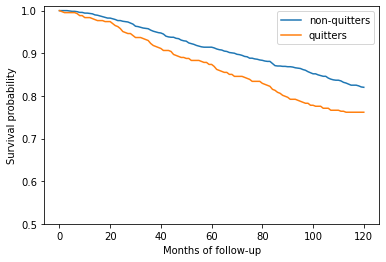

In [8]:
def survival(DF):
    survive_nan = DF['d'].isna().sum()
    denom = len(DF)
    return list(map(
        lambda i: ((DF['d'] > i).sum() + survive_nan)/denom,
        range(121)
    ))
plt.plot(range(121), survival(df[df['qsmk']==0]), label='non-quitters')
plt.plot(range(121), survival(df[df['qsmk']==1]), label='quitters')
plt.ylabel('Survival probability')
plt.xlabel('Months of follow-up')
plt.ylim(0.5,1.01);
plt.legend();

### 5. Risk $ Pr[Y \leq k] = 1- Pr[T>k]$ <a name='risk' />
cumulative incidence, at time $k$ 

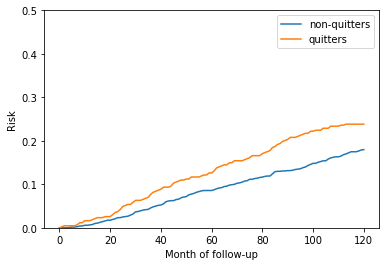

In [9]:
def risk(DF):
    denom = len(DF)
    return list(map(
        lambda i: ((DF['d'] <= i).sum())/denom,
        range(121)
    ))
plt.plot(range(121), risk(df[df['qsmk']==0]), label='non-quitters')
plt.plot(range(121), risk(df[df['qsmk']==1]), label='quitters')
plt.ylabel('Risk')
plt.xlabel('Month of follow-up')
plt.legend()
plt.ylim(0,0.5);

### 6. Hazard $Pr[T=k | T>k-1 ]$ <a name='haz' />
proportion of individuals who develop the event among those who had not developed it before $k$

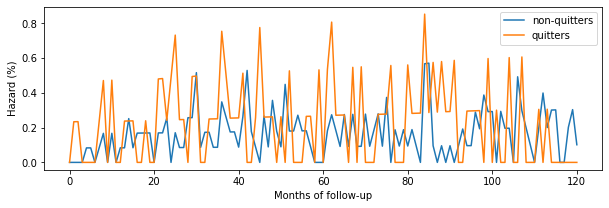

In [10]:
def hazard(DF):
    survive_nan = DF['d'].isna().sum()
    return list(map(
        lambda i: (DF['d']==i).sum() / (survive_nan +(DF['d']>(i-1)).sum()),
        range(121)
    ))
plt.figure(figsize=(10,3))
plt.plot(range(121),
         np.array(hazard(df[df['qsmk']==0]))*100,
         label='non-quitters')
plt.plot(range(121),
         np.array(hazard(df[df['qsmk']==1]))*100,
         label='quitters')
plt.ylabel('Hazard (%)')
plt.xlabel('Months of follow-up');
plt.legend();

### 7. Hazard ratio <a name='har' />
the ratio of the hazards in the treated and the untreated

<ipython-input-11-27397b05eaf3>:4: RuntimeWarning: divide by zero encountered in true_divide
  return numerator/denominator
<ipython-input-11-27397b05eaf3>:4: RuntimeWarning: invalid value encountered in true_divide
  return numerator/denominator


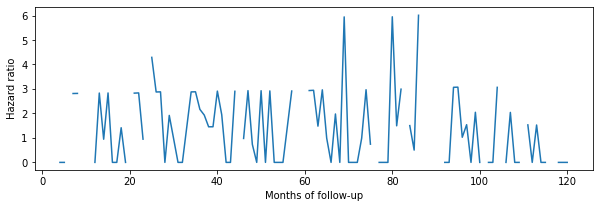

In [11]:
def hazard_ratio(DF):
    numerator = np.array(hazard(DF[DF['qsmk']==1]))
    denominator = np.array(hazard(DF[DF['qsmk']==0]))
    return numerator/denominator

plt.figure(figsize=(10,3))
plt.plot(
    range(121),
    hazard_ratio(df)
)
plt.ylabel('Hazard ratio')
plt.xlabel('Months of follow-up');


### 8. Kaplan Meier<a name='km' />

In [12]:
def survival_curve(hazard):
    survival = [1 - hazard[0]]
    for i in range(1, len(hazard)):
        survival.append((1 - hazard[i]) * survival[i - 1])
    return survival

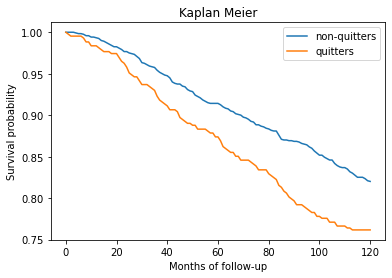

In [13]:
plt.plot(range(121), survival_curve(hazard(df[df['qsmk']==0])), label='non-quitters')
plt.plot(range(121), survival_curve(hazard(df[df['qsmk']==1])), label='quitters')
plt.ylabel('Survival probability')
plt.xlabel('Months of follow-up')
plt.title('Kaplan Meier')
plt.legend();